In [1]:
from tensorflow.python import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.optimizers import Adam
from keras import regularizers
import keras.utils as kerasUtils
import numpy as np 

Using TensorFlow backend.


In [2]:
tokenizer = Tokenizer()

import urllib.request

url = "https://raw.githubusercontent.com/SivadineshPonrajan/Thirukkural-NLP/master/Thirukkural.txt"
file = urllib.request.urlopen(url)
data = ""
for line in file:
    data += line.decode("utf-8") + "\n"
print(data)


# data = """அகர முதல எழுத்தெல்லாம் ஆதி$பகவன்  முதற்றே உலகு.
# கற்றதனால் ஆய பயனென்கொல் வாலறிவன்$நற்றாள் தொழாஅர் எனின்.
# மலர்மிசை ஏகினான் மாணடி சேர்ந்தார்$நிலமிசை நீடுவாழ் வார்.
# வேண்டுதல் வேண்டாமை இலானடி சேர்ந்தார்க்கு$யாண்டும் இடும்பை இல.
# இருள்சேர் இருவினையும் சேரா இறைவன்$பொருள்சேர் புகழ்புரிந்தார் மாட்டு.
# பொறிவாயில் ஐந்தவித்தான் பொய்தீர் ஒழுக்க$நெறிநின்றார் நீடுவாழ் வார்.
# தனக்குவமை இல்லாதான் தாள்சேர்ந்தார்க் கல்லால்$மனக்கவலை மாற்றல் அரிது.
# அறவாழி அந்தணன் தாள்சேர்ந்தார்க் கல்லால்$பிறவாழி நீந்தல் அரிது.
# கோளில் பொறியின் குணமிலவே எண்குணத்தான்$தாளை வணங்காத் தலை.
# பிறவிப் பெருங்கடல் நீந்துவர் நீந்தார்$இறைவன் அடிசேரா தார்.
# வான்நின்று உலகம் வழங்கி வருதலால்$தான்அமிழ்தம் என்றுணரற் பாற்று.
# துப்பார்க்குத் துப்பாய துப்பாக்கித் துப்பார்க்குத்$துப்பாய தூஉம் மழை.
# விண்இன்று பொய்ப்பின் விரிநீர் வியனுலகத்து$உள்நின்று உடற்றும் பசி.
# ஏரின் உழாஅர் உழவர் புயல்என்னும்$வாரி வளங்குன்றிக் கால்.
# கெடுப்பதூஉம் கெட்டார்க்குச் சார்வாய்மற் றாங்கே$எடுப்பதூஉம் எல்லாம் மழை.
# விசும்பின் துளிவீழின் அல்லால்மற் றாங்கே$பசும்புல் தலைகாண்பு அரிது.
# நெடுங்கடலும் தன்நீர்மை குன்றும் தடிந்தெழிலி$தான்நல்கா தாகி விடின்.
# சிறப்பொடு பூசனை செல்லாது வானம்$வறக்குமேல் வானோர்க்கும் ஈண்டு.
# தானம் தவம்இரண்டும் தங்கா வியன்உலகம்$வானம் வழங்கா தெனின்.
# நீர்இன்று அமையாது உலகெனின் யார்யார்க்கும்$வான்இன்று அமையாது ஒழுக்கு.
# ஒழுக்கத்து நீத்தார் பெருமை விழுப்பத்து$வேண்டும் பனுவல் துணிவு.
# துறந்தார் பெருமை துணைக்கூறின் வையத்து$இறந்தாரை எண்ணிக்கொண் டற்று.
# இருமை வகைதெரிந்து ஈண்டுஅறம் பூண்டார்$பெருமை பிறங்கிற்று உலகு."""

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for eachLine in corpus:
    token_list = tokenizer.texts_to_sequences([eachLine])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = kerasUtils.to_categorical(label, num_classes=total_words)

அகர முதல எழுத்தெல்லாம் ஆதி$பகவன்  முதற்றே உலகு.

கற்றதனால் ஆய பயனென்கொல் வாலறிவன்$நற்றாள் தொழாஅர் எனின்.

மலர்மிசை ஏகினான் மாணடி சேர்ந்தார்$நிலமிசை நீடுவாழ் வார்.

வேண்டுதல் வேண்டாமை இலானடி சேர்ந்தார்க்கு$யாண்டும் இடும்பை இல.

இருள்சேர் இருவினையும் சேரா இறைவன்$பொருள்சேர் புகழ்புரிந்தார் மாட்டு.

பொறிவாயில் ஐந்தவித்தான் பொய்தீர் ஒழுக்க$நெறிநின்றார் நீடுவாழ் வார்.

தனக்குவமை இல்லாதான் தாள்சேர்ந்தார்க் கல்லால்$மனக்கவலை மாற்றல் அரிது.

அறவாழி அந்தணன் தாள்சேர்ந்தார்க் கல்லால்$பிறவாழி நீந்தல் அரிது.

கோளில் பொறியின் குணமிலவே எண்குணத்தான்$தாளை வணங்காத் தலை.

பிறவிப் பெருங்கடல் நீந்துவர் நீந்தார்$இறைவன் அடிசேரா தார்.

வான்நின்று உலகம் வழங்கி வருதலால்$தான்அமிழ்தம் என்றுணரற் பாற்று.

துப்பார்க்குத் துப்பாய துப்பாக்கித் துப்பார்க்குத்$துப்பாய தூஉம் மழை.

விண்இன்று பொய்ப்பின் விரிநீர் வியனுலகத்து$உள்நின்று உடற்றும் பசி.

ஏரின் உழாஅர் உழவர் புயல்என்னும்$வாரி வளங்குன்றிக் கால்.

கெடுப்பதூஉம் கெட்டார்க்குச் சார்வாய்மற் றாங்கே$எடுப்பதூஉம் எல்லாம் மழை.

விசும்பின் துளிவீழின் அல்லால்மற் றாங்கே$பசும்புல்

In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(round(total_words/2), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 9, 100)            637900    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 9, 300)            301200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 300)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_1 (Dense)              (None, 3190)              322190    
_________________________________________________________________
dense_2 (Dense)              (None, 6379)              20355389  
Total params: 21,777,079
Trainable params: 21,777,079
Non-trainable params: 0
________________________________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
9389/9389 [==============================] - 24s 3ms/step - loss: 7.6434 - acc: 0.1402
Epoch 2/100
9389/9389 [==============================] - 21s 2ms/step - loss: 7.0624 - acc: 0.1418
Epoch 3/100
9389/9389 [==============================] - 21s 2ms/step - loss: 6.8356 - acc: 0.1444
Epoch 4/100
9389/9389 [==============================] - 21s 2ms/step - loss: 6.6652 - acc: 0.1450
Epoch 5/100
9389/9389 [==============================] - 21s 2ms/step - loss: 6.5456 - acc: 0.1466
Epoch 6/100
9389/9389 [==============================] - 24s 3ms/step - loss: 6.4559 - acc: 0.1463
Epoch 7/100
9389/9389 [==============================] - 27s 3ms/step - loss: 6.3508 - acc: 0.1475
Epoch 8/100
9389/9389 [==============================] - 22s 2ms/step - loss: 6.2402 - acc: 0.1479
Epoch 9/100
9389/9389 [==============================] - 26s 3ms/step - loss: 6.1278 - acc: 0.1502
Epoch 10/100
9389/9389 [==============================] - 22s 2ms/step - loss: 6.0138 - acc: 0.1511
Epoch 11/

9389/9389 [==============================] - 25s 3ms/step - loss: 0.3669 - acc: 0.9826
Epoch 83/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3596 - acc: 0.9831
Epoch 84/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3500 - acc: 0.9824
Epoch 85/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3523 - acc: 0.9810
Epoch 86/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3394 - acc: 0.9807
Epoch 87/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3267 - acc: 0.9829
Epoch 88/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3144 - acc: 0.9832
Epoch 89/100
9389/9389 [==============================] - 26s 3ms/step - loss: 0.3007 - acc: 0.9837
Epoch 90/100
9389/9389 [==============================] - 27s 3ms/step - loss: 0.2911 - acc: 0.9837
Epoch 91/100
9389/9389 [==============================] - 25s 3ms/step - loss: 0.2868 - acc: 0.9842
Epoch 92/100


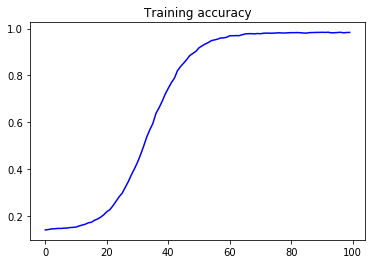

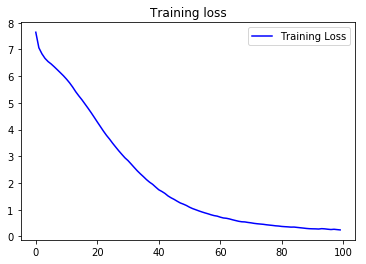

In [6]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [11]:
seed_text = "துப்பார்க்குத்"
next_words = 6
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict_classes(token_list, verbose=0)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)

துப்பார்க்குத் துப்பாய துப்பாக்கித் துப்பார்க்குத் துப்பாய தூஉம் மழை
